<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-0.1">Importing Libraries</a></span></li><li><span><a href="#Importing-the-dataset" data-toc-modified-id="Importing-the-dataset-0.2">Importing the dataset</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-Data---Target" data-toc-modified-id="Distribution-of-Data---Target-0.2.1">Distribution of Data - Target</a></span></li><li><span><a href="#Steps-to-clean-the-data" data-toc-modified-id="Steps-to-clean-the-data-0.2.2">Steps to clean the data</a></span></li></ul></li><li><span><a href="#Pre-process-Text" data-toc-modified-id="Pre-process-Text-0.3">Pre-process Text</a></span></li><li><span><a href="#Word-Cloud" data-toc-modified-id="Word-Cloud-0.4">Word Cloud</a></span></li><li><span><a href="#Split-Data" data-toc-modified-id="Split-Data-0.5">Split Data</a></span></li><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-0.6">TF-IDF</a></span></li><li><span><a href="#CountVectorizer" data-toc-modified-id="CountVectorizer-0.7">CountVectorizer</a></span></li></ul></li><li><span><a href="#Word-Embedding-using-Word2Vec" data-toc-modified-id="Word-Embedding-using-Word2Vec-1">Word Embedding using Word2Vec</a></span></li></ul></div>

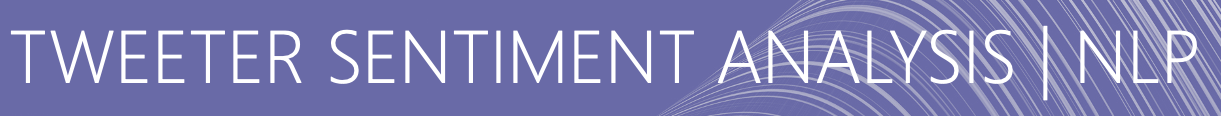

### Importing Libraries

In [1]:
# Import Sklearn libraries to build models 
from sklearn.feature_extraction.text import TfidfVectorizer #  TF-IDF to vectorize words 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
# Import Libraries to perform computation and do visualization. 
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
import string

# Import nltk to check english lexicon.
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, stopwords
from nltk import word_tokenize, FreqDist
from nltk import pos_tag # for Parts of Speech tagging
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Generate wordcloud for word distribution visualization.
from wordcloud import WordCloud 

# Generating random numbers.
import random 

from xgboost import XGBClassifier

# Transforms text to a fixed-length vector of integers.
from gensim.models import Word2Vec 

import os

import textdistance
#Efficient functions to search in strings.
import re as re 

# Import images for world cloud.
from PIL import Image, ImageDraw, ImageFont 


# # Keras
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
# from keras import utils
# from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Import Yellowbrick and vector coupon for visualization of frequent words
 
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

from tqdm.notebook import tqdm

from os import path
from os import environ

### Importing the dataset

In [2]:
DATASET_COLUMNS=["sentiment", "ids", "date", "flag", "user", "tweet"]
DATASET_ENCODING = "ISO-8859-1"
ta_df = pd.read_csv(r'D:\OneDrive - NITT\Custom_Download\training.1600000.processed.noemoticon.csv', 
                    encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

ta_df.head()

,sentiment,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
ta_df = ta_df.sample(10000,random_state=42)

In [5]:
ta_df.shape

(10000, 6)

In [6]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 398430 to 1013061
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  10000 non-null  int64 
 1   ids        10000 non-null  int64 
 2   date       10000 non-null  object
 3   flag       10000 non-null  object
 4   user       10000 non-null  object
 5   tweet      10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 546.9+ KB


In [7]:
ta_df.isna().mean()*100

sentiment    0.0
ids          0.0
date         0.0
flag         0.0
user         0.0
tweet        0.0
dtype: float64

In [8]:
ta_df['flag'].unique()

array(['NO_QUERY'], dtype=object)

In [9]:
ta_df.drop(['flag','ids'], axis=1, inplace = True)


In [14]:
ta_df.head()

,sentiment,date,user,tweet
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem


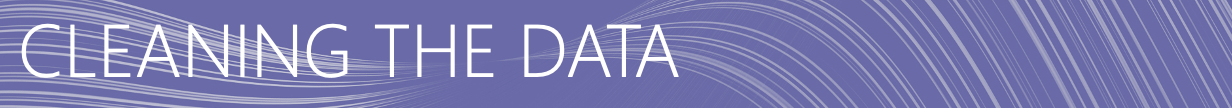

In [15]:
# Checking length 
print('length of data is', len(ta_df))

length of data is 10000


#### Distribution of Data - Target 

In [10]:
ta_df['sentiment'].unique()

array([0, 4], dtype=int64)

In [11]:
ta_df['sentiment'].value_counts(normalize=True)*100

0    50.04
4    49.96
Name: sentiment, dtype: float64

In [18]:

# Replacing the value 4 -->1 for ease of understanding.
# 0 = negative, 1 = positive
ta_df['sentiment'] = ta_df['sentiment'].replace(4,1)
ta_df.head()

,sentiment,date,user,tweet
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem


[Text(0.5, 1.0, 'Count of Tweets per Sentiment')]

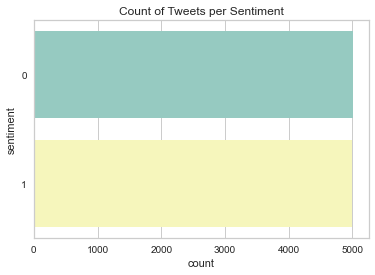

In [19]:
# Plot the count plot for the target labels.


p = sns.countplot(data = ta_df, y = 'sentiment', palette="Set3") #Setting p to plot of Emotion
p.set(xlabel = 'count') #Labling X
p.set(ylabel = 'sentiment') #Labling Y
p.set(title = "Count of Tweets per Sentiment")

In [20]:
print('Count of columns in the data is:  ', len(ta_df.columns))
print('Count of rows in the data is:  ', len(ta_df))

Count of columns in the data is:   4
Count of rows in the data is:   10000


#### Steps to clean the data

* Checking and handling NaN values
* Drop duplicate



In [21]:
ta_df.dropna(inplace=True)

In [22]:
len(ta_df.duplicated(keep='last'))

10000

In [23]:
ta_df.drop_duplicates()
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 541200 to 117202
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  10000 non-null  int64 
 1   date       10000 non-null  object
 2   user       10000 non-null  object
 3   tweet      10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 390.6+ KB


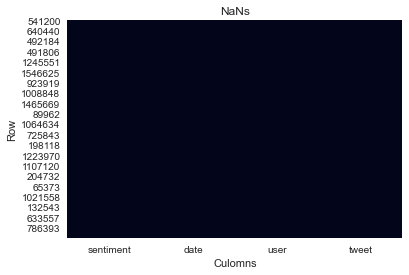

In [24]:
# Checking for Null values.  We use the heatmap code which shows the contrast well.

sns.heatmap(ta_df.isnull(), cbar=False)
plt.title("NaNs")
plt.xlabel('Culomns')
plt.ylabel('Row')
plt.show()

In [25]:
# Removing duplicate values
ta_df.drop_duplicates(inplace = True) 

In [26]:

# Creating an independent copy  

ta_df_copy = ta_df.copy()

### Pre-process Text

We will use text processing to allow the data to be more digestible for model use later in this project. This is an integral step in Natural Language Processing (NLP). 


The Preprocessing steps taken are:

* Converting to lower case letters: Each text will be transferred to a lower case letter.

* Removing Stopwords: Stopwords are common words used in the English language and do not add meaning to the sentences. Therefore we can remove them without sacrificing the meaning of the sentence. 

* Removing Words  with 2 letters: Words with length less than 2 are removed.

* Replacing http with space: Links starting with "http" or "https" or "www" are replaced by " 
".

* Lemmetizing 

In [27]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [28]:
def clean_tweet(tweet):
    
    tweet= tweet.lower()
    
    # Remove user_name @
    tweet = re.sub('(@[a-z0-9]+)\w+', '', tweet)
    
    tweet = re.sub('(#[a-z0-9]+)\w+', '', tweet)
    
    # Remove all non alphabets
    tweet = re.sub('([^0-9a-z \t])', '', tweet)
    
    # Remove hyperlinks
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Remove RT
    tweet = re.sub(r'^rt[\s]+', '', tweet)
    
    # Remove emojis
    tweet = re.sub(r'emojis', '', tweet)
    
    return tweet

In [29]:
wordLemm = WordNetLemmatizer()

In [30]:
wordLemm.lemmatize('abaci')

'abacus'

In [31]:
# Testing PorterStemmer

In [32]:
tqdm.pandas()
ps = PorterStemmer()

TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# Replace 3 or more consecutive letters by 2 letter.
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

stop_words = set(stopwords.words("english"))

def preprocess(text,apply_stem=True):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    text = re.sub(sequencePattern, seqReplacePattern, text)
    
    tokens = []
    for token in text.split():
        if token not in stop_words:
            
            if apply_stem:
                tokens.append(ps.stem(token))
            else:
                tokens.append(token)
            
    return " ".join(tokens)

In [33]:
ta_df['clean_tweet'] = ta_df['tweet'].progress_apply(lambda x:preprocess(x,True))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [34]:
ta_df['clean_tweet_wt_stem'] = ta_df['tweet'].progress_apply(lambda x:preprocess(x,False))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [35]:
# ta_df.drop('clean_tweets',axis=1,inplace=True)

In [36]:
ta_df.head()

,sentiment,date,user,tweet,clean_tweet,clean_tweet_wt_stem
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahh hope ok,ahh hope ok
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool tweet app razr 2,cool tweet apps razr 2
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...,know famili drama lame hey next time u hang ki...,know family drama lame hey next time u hang ki...
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...,school email open geographi stuff revis stupid...,school email open geography stuff revise stupi...
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem,upper airway problem,upper airways problem


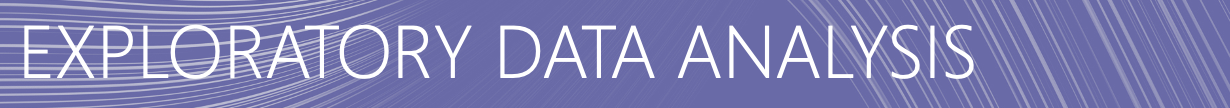

### Word Cloud

In [37]:
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return tuple(Reds_9.colors[random.randint(6,8)])  # Function to help us generate wordcloud

In [38]:
# text = ta_df['clean_tweet_wt_stem']

In [39]:
# mask = np.array(Image.open('/kaggle/input/pics-proj/tu.png'))

In [40]:
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return tuple(Reds_9.colors[random.randint(6,8)])  # Function to help us generate wordcloud

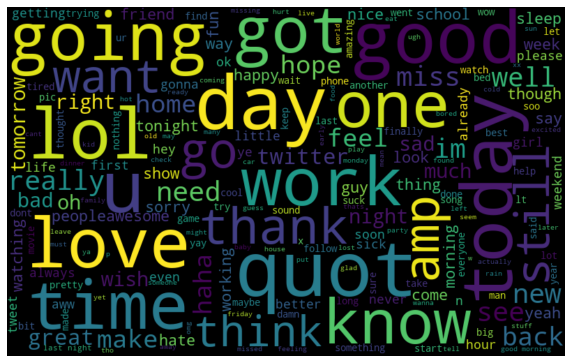

In [41]:
all_words = ' '.join([text for text in ta_df['clean_tweet_wt_stem']])

wordcloud = WordCloud(width=800, height=500, random_state=21, 
                      max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:
tweets = ta_df['clean_tweet_wt_stem']

In [43]:
tweet_negative = ta_df[ta_df['sentiment']==0]
tweet_positive = ta_df[ta_df['sentiment']==1]

In [44]:
tweet_negative = tweet_negative['clean_tweet_wt_stem']
tweet_positive = tweet_positive['clean_tweet_wt_stem']

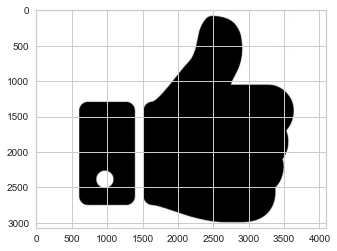

In [45]:
img = Image.open('upvote.png')
img.resize((20, 20), Image.ANTIALIAS)
plt.imshow(img)

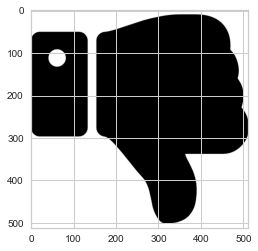

In [46]:
mask_d = Image.open('final.png')
mask_d.resize((20, 20), Image.ANTIALIAS)
plt.imshow(mask_d)

In [47]:
tweets = ta_df['clean_tweet_wt_stem'] 
# Create a new dataframe for the tweets that have stemming 


In [48]:
# def create_wordcloud(text):
#  mask = np.array(Image.open('tu.png'))
#  #stopwords = set(STOPWORDS)
#  wc_pos_text = ' '.join([text for text in tweet_positive])

#  wc_pos = WordCloud(background_color='white',
#  mask = mask, width=800, height=500, random_state=21, 
#                       max_font_size=110).generate(wc_pos_text)

    
#  wc_pos.to_file('wc.png')

#  print('Word Cloud Saved Successfully')
#  path = 'wc.png'
#  display(Image.open(path))

In [49]:
def wc(data,bgcolor,title, mask):
    
    plt.figure(figsize = (50,50))
    
    wc = WordCloud(width = 3000, height = 2000,background_color='white',
                   max_words = 500,  max_font_size = 100,
                   colormap='rainbow',mask=mask)
    
    wc.generate(' '.join(data))
    
    plt.imshow(wc)
    
    plt.axis('off')

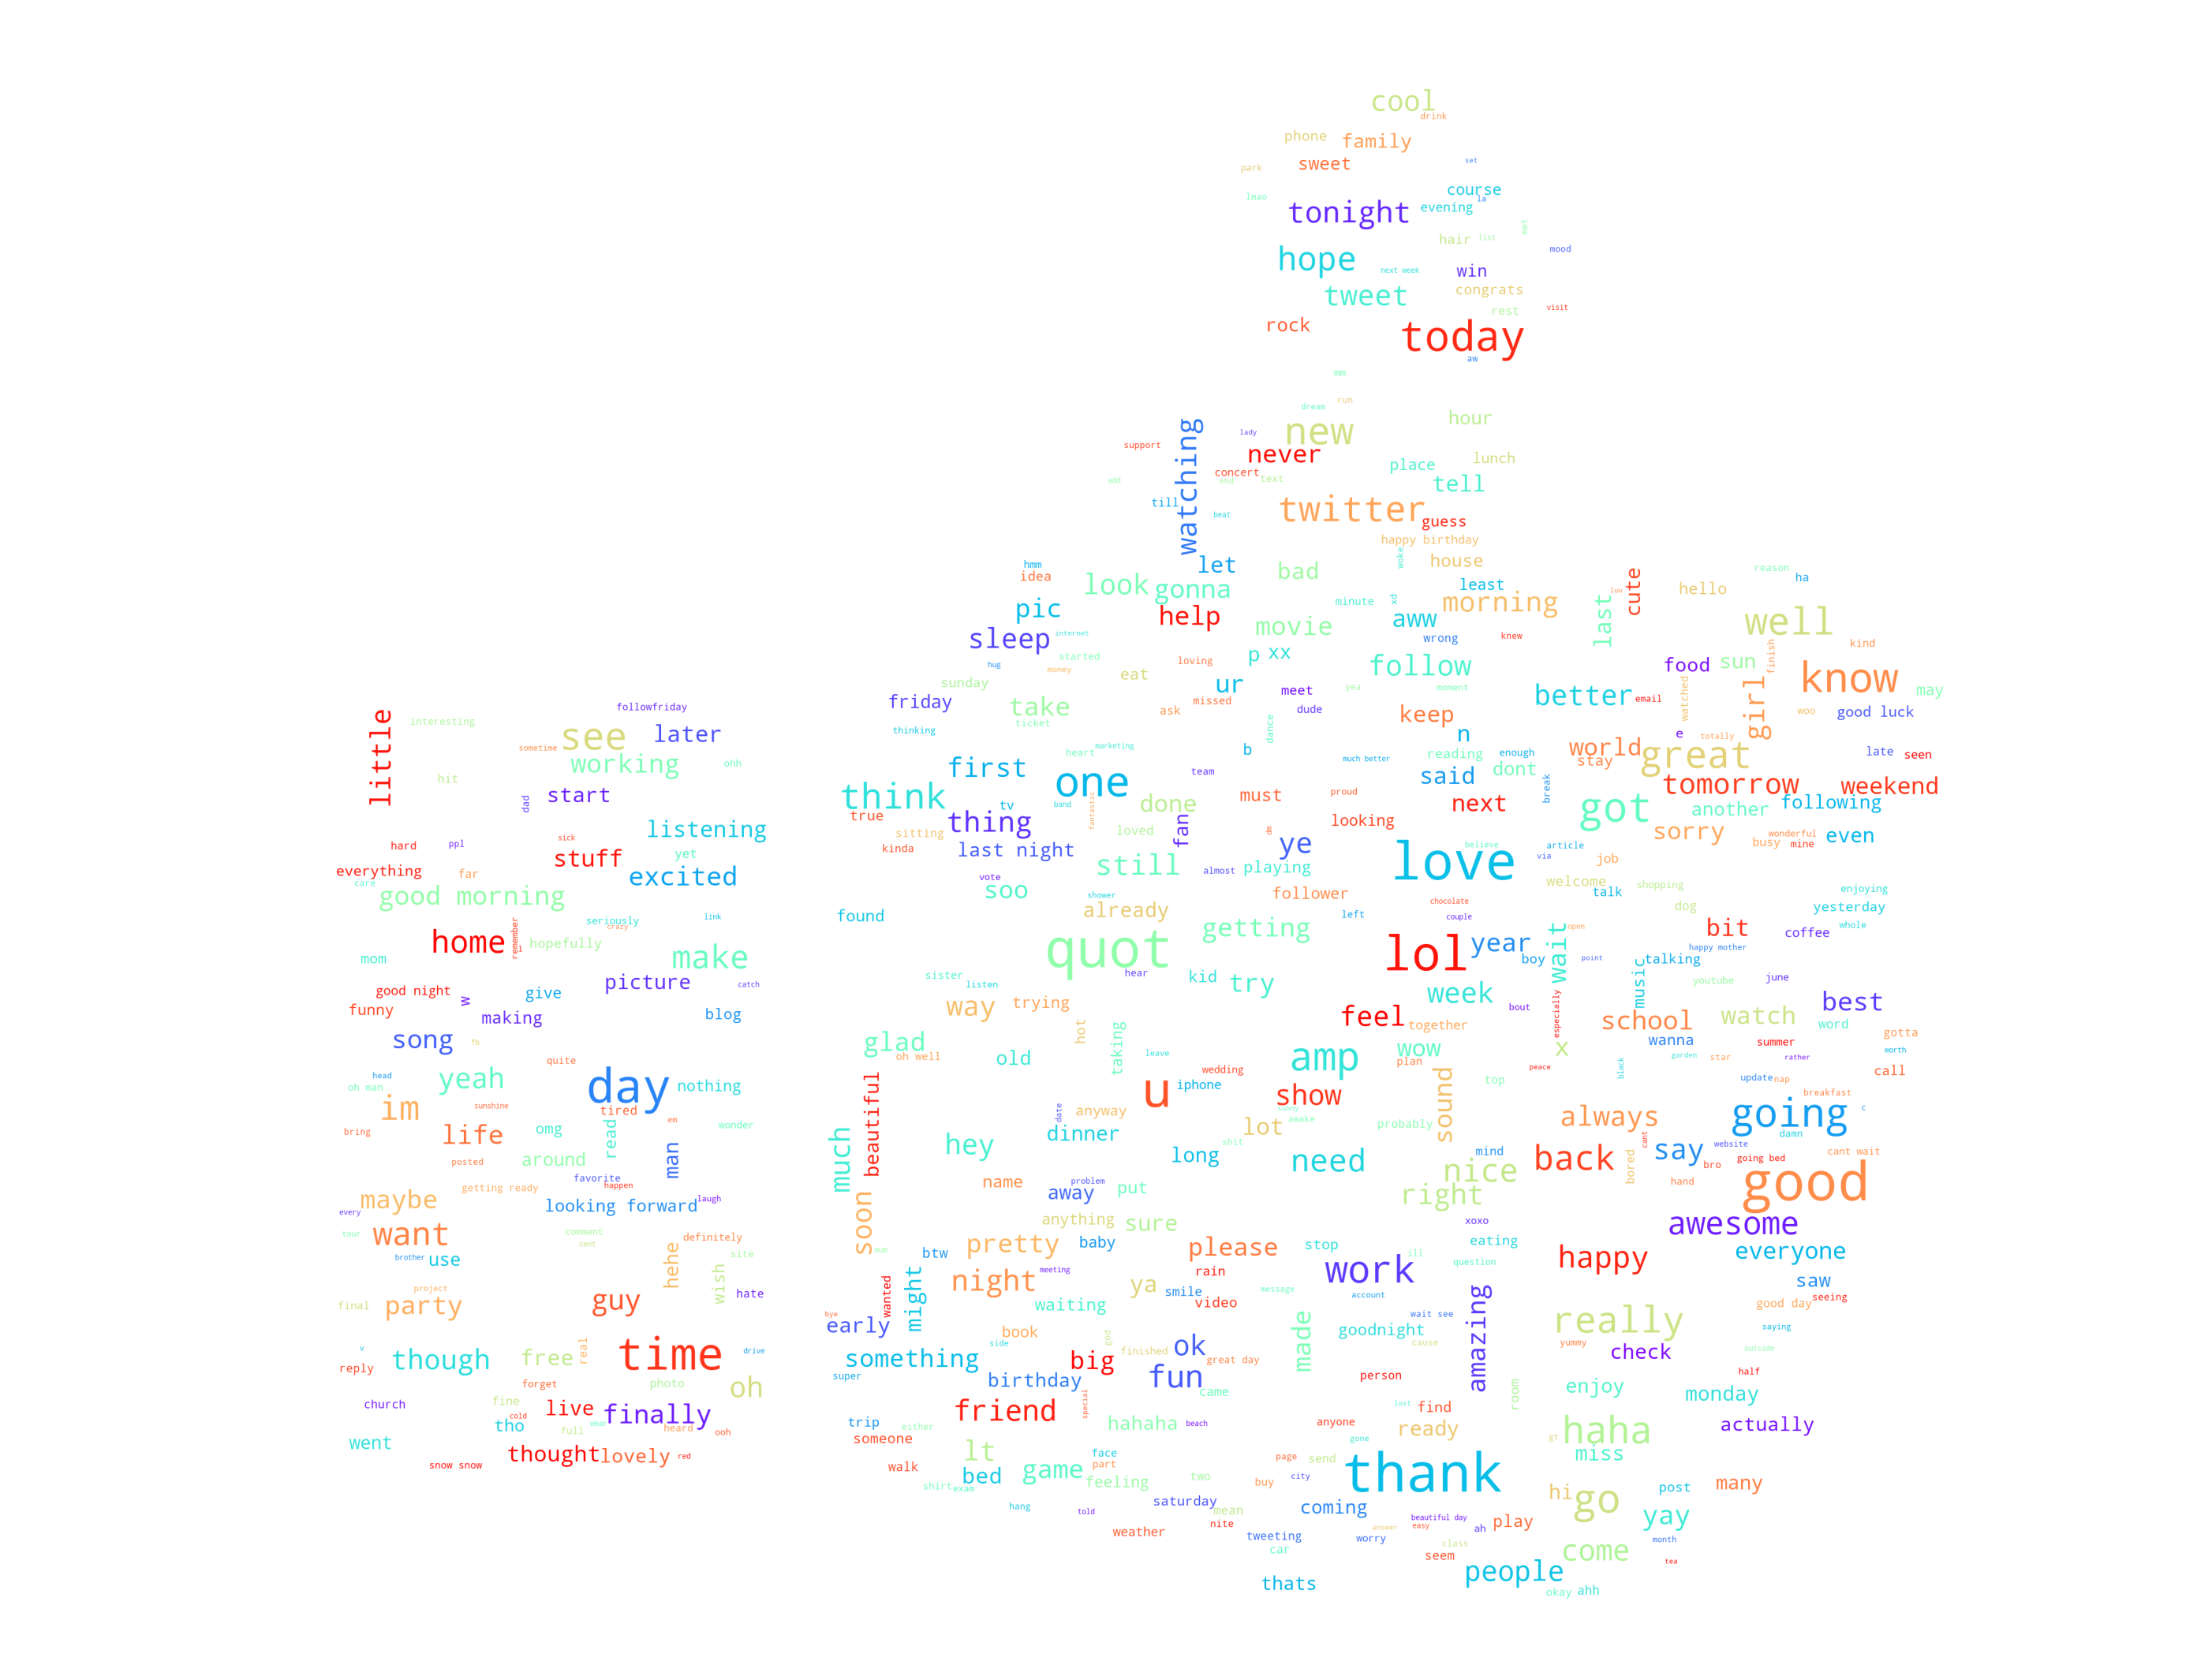

In [50]:
mask_pos = np.array(Image.open('upvote.png'))
wc(tweet_positive,'black','Common Words', mask_pos)

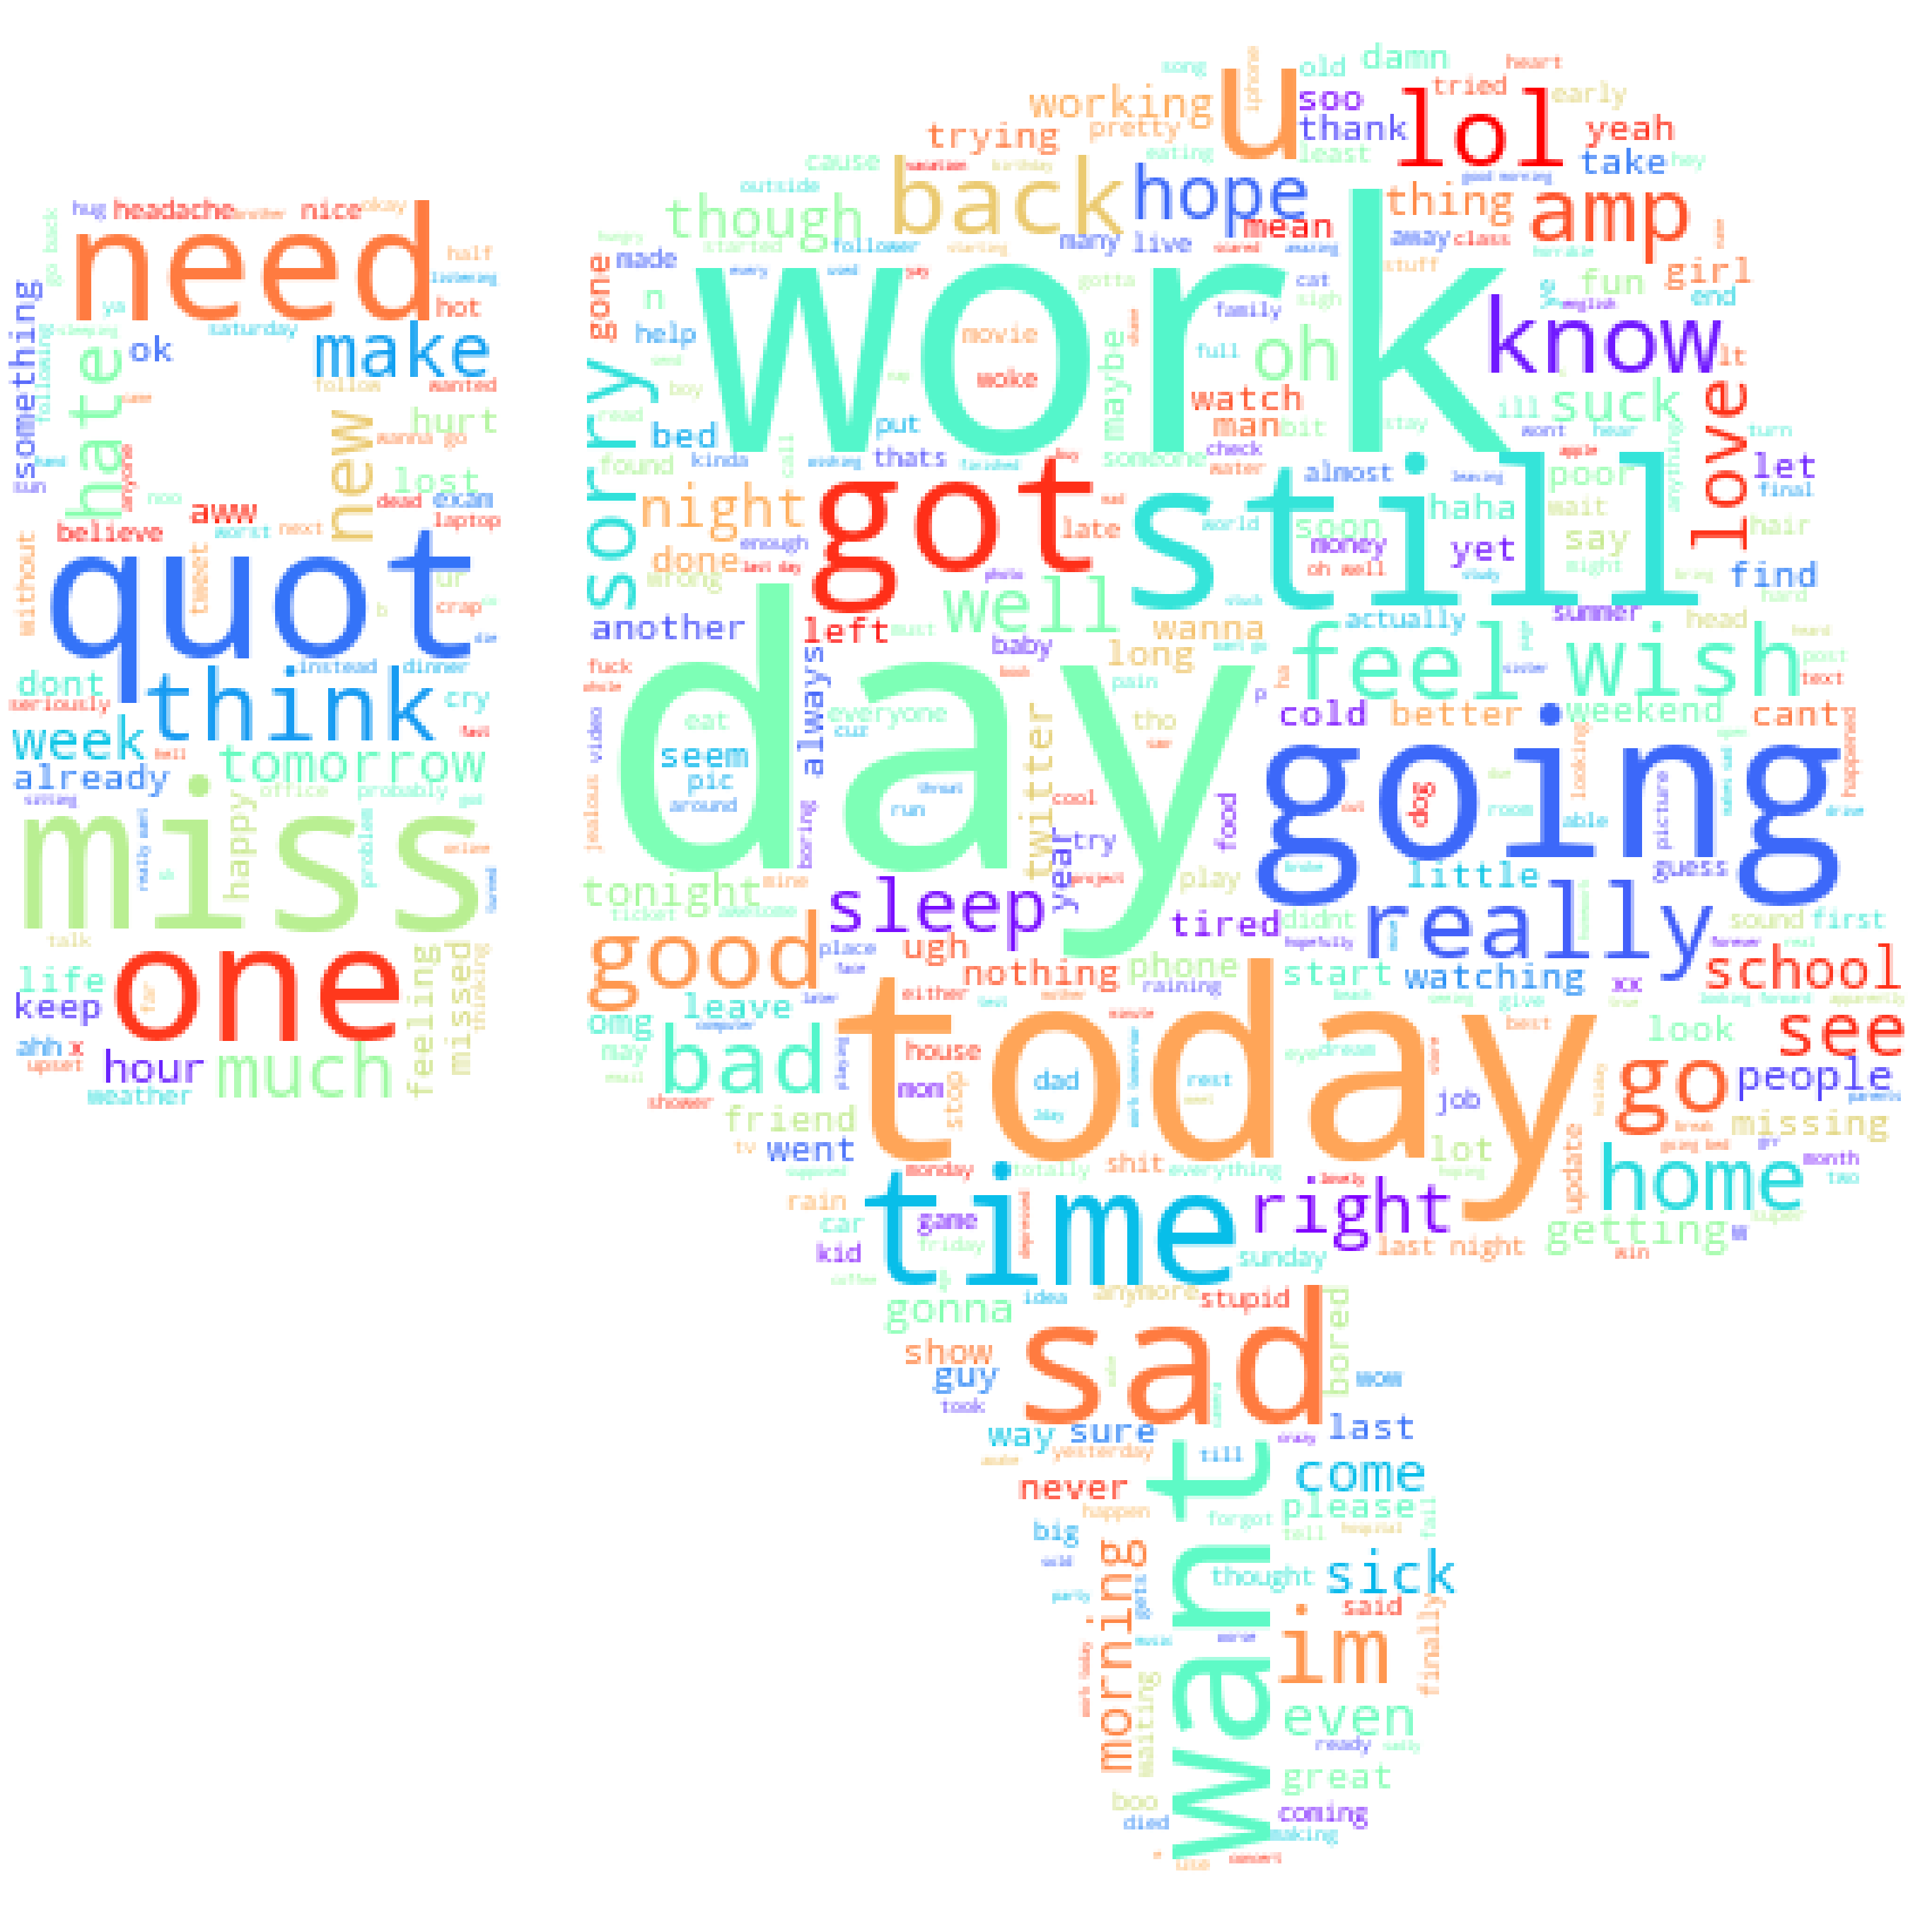

In [51]:
mask_neg = np.array(Image.open('final.png'))
wc(tweet_negative,'black','Common Words', mask_neg)

In [52]:

#     pos_df = ta_df['clean_tweet'].loc[ta_df['sentiment'] == 1] 
#     #New dataframe of only positive rated tweet tokens

#     neg_df = ta_df['clean_tweet'].loc[ta_df['sentiment'] == 0] 
#     #New dataframe of only negative rated tweet tokens

In [53]:
pos_df = ta_df['clean_tweet'].loc[ta_df['sentiment'] == 1].progress_apply(lambda line:line.split())


  0%|          | 0/4996 [00:00<?, ?it/s]

In [54]:
neg_df = ta_df['clean_tweet'].loc[ta_df['sentiment'] == 0].progress_apply(lambda line:line.split())


  0%|          | 0/5004 [00:00<?, ?it/s]

In [55]:

tokens = [] #Instantiating total token list
tokens_pos = [] #Instantiating positive token list
tokens_neg = [] #Instantiating negative token list


for row in pos_df:
    tokens.extend(row) #Populating token list from dataframe
for row in pos_df:
    tokens_pos.extend(row) #Populating token list from dataframe
for row in neg_df:
    tokens_neg.extend(row) #Populating token list from dataframe

print(f'Total Corpus Tokens: {len(tokens)}') 
# Print total number of tokens
print(f'Number of Positive Tokens: {len(tokens_pos)}') 
# Print number of positive tokens
print(f'Number of Negative Tokens: {len(tokens_neg)}') 
# Print number of negative tokens


Total Corpus Tokens: 35890
Number of Positive Tokens: 35890
Number of Negative Tokens: 36648


In [56]:
tokens

['lunch',
 'dj',
 'come',
 'eat',
 'thank',
 'glad',
 'like',
 'product',
 'review',
 'bit',
 'site',
 'enjoy',
 'knit',
 'zach',
 'make',
 'pee',
 'sit',
 'grown',
 'gay',
 'man',
 'sum',
 'day',
 'one',
 'word',
 'kacker',
 'great',
 'mind',
 'think',
 'alik',
 'oh',
 'realli',
 'great',
 'small',
 'blizzard',
 'also',
 'cold',
 'wind',
 'blow',
 'lol',
 'calm',
 'got',
 '30day',
 'loan',
 'offer',
 '1500',
 'feel',
 'quit',
 'sleepi',
 'today',
 'wish',
 'could',
 'stay',
 'bed',
 'today',
 'ok',
 'last',
 'year',
 'let',
 'go',
 'school',
 'whaddup',
 'whaddup',
 'whaddup',
 'whaddup',
 'whaddup',
 'got',
 'white',
 'girl',
 'swag',
 'head',
 'shoe',
 'whaddup',
 'yungla',
 'will',
 'pay',
 '40',
 '50',
 'thu',
 'cover',
 'cost',
 'set',
 'one',
 'got',
 'counter',
 'offer',
 'listen',
 'work',
 'photo',
 'hillsong',
 '1',
 'year',
 'celebr',
 'stay',
 'tune',
 'ww',
 'hillsong',
 'co',
 'za',
 'ha',
 'ha',
 'want',
 'see',
 'pictur',
 'minist',
 'boobi',
 'flahs',
 'im',
 'turn',


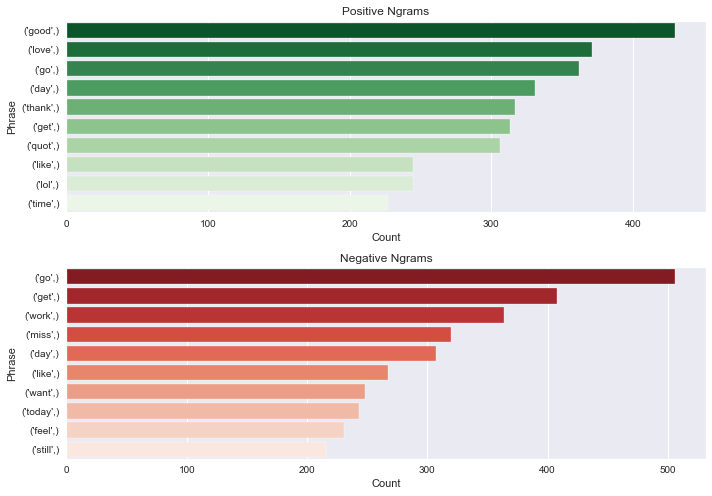

In [57]:
def make_ngram(i, tokens_pos = tokens_pos, tokens_neg = tokens_neg): #Defining function
    
    n_gram_pos = (pd.Series(nltk.ngrams(tokens_pos, i)).value_counts())[:10] #Setting up positive ngram
    n_gram_neg = (pd.Series(nltk.ngrams(tokens_neg, i)).value_counts())[:10] #Setting up negative ngram
    
    n_gram_df_pos = pd.DataFrame(n_gram_pos) #Creating positive ngram dataframe
    n_gram_df_neg = pd.DataFrame(n_gram_neg) #Creating negative ngram dataframe
    
    n_gram_df_pos = n_gram_df_pos.reset_index() #Resetting index
    n_gram_df_neg = n_gram_df_neg.reset_index() #Resetting index
    
    n_gram_df_pos = n_gram_df_pos.rename(columns = {'index': 'Phrase', 0: 'Count'}) #Renaming positive plot
    n_gram_df_neg = n_gram_df_neg.rename(columns = {'index': 'Phrase', 0: 'Count'}) #Renaming negative plot
    
    with sns.axes_style('darkgrid'): #Setting seaborn to darkgrid style
        
        fig = plt.figure(figsize = (10, 10)) #Setting figsize
        ax1 = fig.add_subplot(311) #Stacking first figure
        ax2 = fig.add_subplot(312) #Stacking second figure
        
        sns.barplot(ax = ax1, x = 'Count', y = 'Phrase', data = n_gram_df_pos, 
                    palette = 'Greens_r').set(title = 'Positive Ngrams') #Assigning barplot to positive ngrams
        sns.barplot(ax = ax2, x = 'Count', y = 'Phrase', data = n_gram_df_neg, 
                   palette = 'Reds_r').set(title = 'Negative Ngrams') #Assigning barplot to negative ngrams
        
        
    plt.tight_layout() #Make plot layouts tight

make_ngram(1) #Plot 1 word ngrams

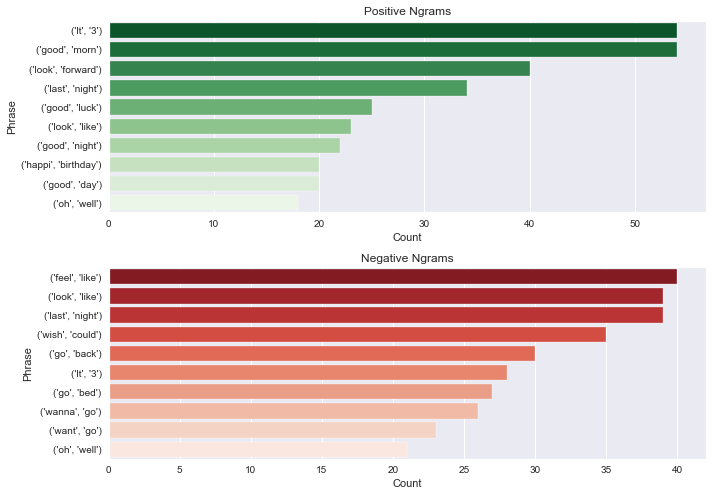

In [58]:
make_ngram(2) #Plot 2 word ngrams

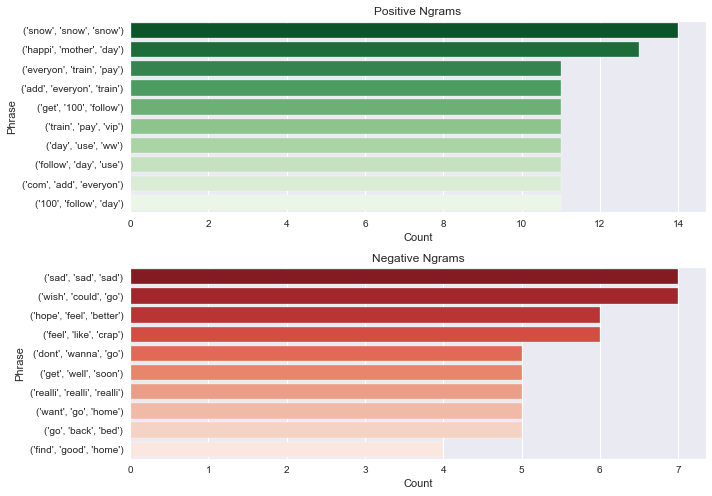

In [59]:
make_ngram(3) #Plot 3 word ngrams

In [60]:
# Need to fix the above

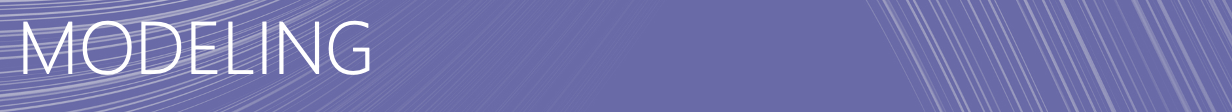

### Split Data 

In [61]:
X = ta_df['clean_tweet']#[:50000]

y = ta_df['sentiment']#[:50000]

In [62]:
list(set(ta_df['sentiment']))

[0, 1]

In [63]:
y.head()

541200    0
750       0
766711    0
285055    0
705995    0
Name: sentiment, dtype: int64

In [64]:
ta_df['sentiment'].value_counts()

0    5004
1    4996
Name: sentiment, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [66]:
# Checking shape of train and test data

print(X_train.shape, y_train.shape) 

print(X_test.shape , y_test.shape) 


(7500,) (7500,)
(2500,) (2500,)


In [67]:
### Visulization

### TF-IDF

In [68]:
vectoriser_tfidf = TfidfVectorizer()

In [69]:
vectoriser_tfidf.fit(X_train)

print('Number of feature words:', len(vectoriser_tfidf.get_feature_names()))

Number of feature words: 9441


In [70]:
X_train_tfidf = vectoriser_tfidf.transform(X_train)
X_test_tfidf  = vectoriser_tfidf.transform(X_test)

In [71]:
# print(X_train_tfidf.toarray())

In [72]:
1199859*221591/1024/1024

253560.97762012482

### CountVectorizer

In [73]:
vectorizer_vc = CountVectorizer()
vectorizer_vc.fit(X_train)

CountVectorizer()

In [74]:
X_train_vc = vectorizer_vc.transform(X_train)
X_test_vc  = vectorizer_vc.transform(X_test)

In [75]:
# Building a function that will fit the model and then fit it to produce predicted values. 

def Train_Test_Scores(model,X_train,y_train,X_test,y_test,display=False):
    
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    
    # Store the score for later evaluation of the model. 
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    precision = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1 = f1_score(y_test,y_preds)
    
    # Allowing the display to switch off for later on when I just need to function to run 
    # for other purposes like creating a data frame of the scoring. 
    
    if display:
        print('Training_Accuracy:',  train_acc)
        print('Test_Accuracy:', test_acc)

        print('Precision:', precision)
        print('Recall:', recall) 
        print('F1_Score:', f1)
          
        plot_confusion_matrix(model, X_test, y_test, cmap="Blues")
          
          
    return train_acc,test_acc,precision,recall,f1

In [76]:
from tqdm.notebook import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,precision_score,recall_score, plot_confusion_matrix

In [77]:
s = "Creating a data frame to collect all the results and evaluate them"

In [78]:
s.upper()

'CREATING A DATA FRAME TO COLLECT ALL THE RESULTS AND EVALUATE THEM'

In [79]:
s.split()

['Creating',
 'a',
 'data',
 'frame',
 'to',
 'collect',
 'all',
 'the',
 'results',
 'and',
 'evaluate',
 'them']

In [80]:
 # Function that prints confusion matrix and class report.

# def confmat_and_classrep(estimator, X_train, y_train,X_test,y_test name): 
    
#     estimator.fit(X_train, y_train)
#     predictions = estimator.predict(X_test) #  Estimators prediction

#     # Print name of the classification report 
#     print(f'Classification Report for {name} Set') 
    
    
#     # Print classification report numbers
    
#     print(classification_report(y_test, predictions,)) 
    
    
#     # Making subplots for each matrix
    
#     fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5)) 
    
#     matrix = plot_confusion_matrix(estimator, X, y,  
#                                    cmap = plt.cm.viridis, 
#                                    xticks_rotation = 70, 
#                                    values_format = 'd', 
#                                    ax = axes[0]) # Plot non-normal matrix
    
#     matrix.ax_.set_title(f'{name} Set Confusion Matrix, \n without Normalization') 
#     # setting title of non-normal
    
#     matrix = plot_confusion_matrix(estimator, X, y, cmap = plt.cm.viridis, 
#                                   xticks_rotation = 70, normalize = 'true', ax = axes[1]) 
#     # plot normal matrix
    
#     matrix.ax_.set_title(f'{name} Set Confusion Matrix, \n with Normalization') 
#     # setting title of normal matrix
    
    
#     plt.subplots_adjust(wspace = 0.5) #Adding space between graphs
    
#     plt.show() #Showing matrix

In [81]:
# y_pred = clf.predict(X_test_vc)

In [82]:
# rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [83]:
# gnb = GaussianNB()

In [84]:
# xgboost = XGBClassifier(n_jobs=-1)

In [85]:
# confmat_and_classrep(rf, X_train_vc, y_train, 'Training Data')


In [86]:
# confmat_and_classrep(xgboost, X_train_vc, y_train, 'Training Data')


## Word Embedding using Word2Vec

In [87]:
corpus = X.progress_apply(lambda line:line.split())

  0%|          | 0/10000 [00:00<?, ?it/s]

In [88]:
corpus

541200                                       [ahh, hope, ok]
750                              [cool, tweet, app, razr, 2]
766711     [know, famili, drama, lame, hey, next, time, u...
285055     [school, email, open, geographi, stuff, revis,...
705995                              [upper, airway, problem]
                                 ...                        
965972     [sister, cheyenn, birthday, parti, today, gonn...
1193436                                             [welcom]
896390      [serious, gal, make, nervou, parti, thank, come]
544127     [thank, want, chicken, cheesecak, togeath, tho...
117202     [sadli, probabl, true, tri, trident, competit,...
Name: clean_tweet, Length: 10000, dtype: object

In [89]:
# Train Word2Vec Model on corpus
model = Word2Vec(corpus, 
                 min_count=1,          # word frequency
                 vector_size=200,      # dimention of word embeddings
                 workers=os.cpu_count(),            # Number of processors
                 sg=1                  # 1 for skip-gram
                ) 

In [90]:
ta_df['tokens'] = ta_df['clean_tweet'].progress_apply(lambda line:line.split())

  0%|          | 0/10000 [00:00<?, ?it/s]

In [91]:
ta_df.head()

,sentiment,date,user,tweet,clean_tweet,clean_tweet_wt_stem,tokens
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahh hope ok,ahh hope ok,"[ahh, hope, ok]"
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool tweet app razr 2,cool tweet apps razr 2,"[cool, tweet, app, razr, 2]"
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...,know famili drama lame hey next time u hang ki...,know family drama lame hey next time u hang ki...,"[know, famili, drama, lame, hey, next, time, u..."
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...,school email open geographi stuff revis stupid...,school email open geography stuff revise stupi...,"[school, email, open, geographi, stuff, revis,..."
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem,upper airway problem,upper airways problem,"[upper, airway, problem]"


In [92]:
ta_df = ta_df[ta_df['tokens'].apply(lambda line: True if len(line) else False)]

In [93]:
ta_df

,sentiment,date,user,tweet,clean_tweet,clean_tweet_wt_stem,tokens
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahh hope ok,ahh hope ok,"[ahh, hope, ok]"
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool tweet app razr 2,cool tweet apps razr 2,"[cool, tweet, app, razr, 2]"
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...,know famili drama lame hey next time u hang ki...,know family drama lame hey next time u hang ki...,"[know, famili, drama, lame, hey, next, time, u..."
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...,school email open geographi stuff revis stupid...,school email open geography stuff revise stupi...,"[school, email, open, geographi, stuff, revis,..."
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem,upper airway problem,upper airways problem,"[upper, airway, problem]"
...,...,...,...,...,...,...,...
965972,1,Sun May 17 11:10:20 PDT 2009,Hici96,"My sister, Cheyenne's birthday party is today!...",sister cheyenn birthday parti today gonna much...,sister cheyenne birthday party today gonna muc...,"[sister, cheyenn, birthday, parti, today, gonn..."
1193436,1,Sun May 31 14:45:44 PDT 2009,dauria,@addieking you are SO welcome,welcom,welcome,[welcom]
896390,1,Sun May 03 21:21:45 PDT 2009,evankmathews,@RebekahMaylene seriously!! Those gals were ma...,serious gal make nervou parti thank come,seriously gals making nervous party thanks coming,"[serious, gal, make, nervou, parti, thank, come]"
544127,0,Tue Jun 16 19:40:27 PDT 2009,jimbafrosty,@SarahMascara thanks now i want chicken and ch...,thank want chicken cheesecak togeath though,thanks want chicken cheesecake togeather though,"[thank, want, chicken, cheesecak, togeath, tho..."


In [94]:
X_w2v = ta_df['tokens']#[:50000]
y_w2v = ta_df['sentiment']#[:50000]

In [95]:
len(X_w2v)

9950

In [96]:
# model.wv.get_vector('there')

In [97]:
all_word2vec_vocab = set(model.wv.key_to_index)

In [98]:
def get_embed(token_list):
    n = len(token_list)
    embed = np.zeros((200))
    for token in token_list:
        if token in all_word2vec_vocab:
            embed = embed + model.wv.get_vector(token)
        else:
            temp = sorted([(textdistance.levenshtein.normalized_distance(e,token), e) for e in all_word2vec_vocab],reverse=False)[0][1]
            embed = embed + model.wv.get_vector(temp)
    return embed/n

In [99]:
X_w2v_embed = X_w2v.progress_apply(get_embed)

  0%|          | 0/9950 [00:00<?, ?it/s]

In [100]:
X_w2v_embed

541200     [0.11424195269743602, -0.04426339392860731, 0....
750        [0.08662307392805815, -0.028381950315088035, 0...
766711     [0.10342388570700821, -0.031854484426347834, 0...
285055     [0.09327499149367213, -0.032482554437592626, 0...
705995     [0.0458830501884222, -0.01501636893954128, 0.0...
                                 ...                        
965972     [0.09996862907428294, -0.04105174208962126, 0....
1193436    [0.09679600596427917, -0.03444141894578934, 0....
896390     [0.09276385286024638, -0.03229302799861346, 0....
544127     [0.078214991313871, -0.030296155562003452, 0.0...
117202     [0.08573431767184626, -0.033839754993095994, 0...
Name: tokens, Length: 9950, dtype: object

In [101]:
# get_embed(['hi','there'])

In [102]:
df_new = pd.DataFrame(X_w2v_embed)

In [103]:
df_new.reset_index(drop=True,inplace=True)

In [104]:
df_new

,tokens
0,"[0.11424195269743602, -0.04426339392860731, 0...."
1,"[0.08662307392805815, -0.028381950315088035, 0..."
2,"[0.10342388570700821, -0.031854484426347834, 0..."
3,"[0.09327499149367213, -0.032482554437592626, 0..."
4,"[0.0458830501884222, -0.01501636893954128, 0.0..."
...,...
9945,"[0.09996862907428294, -0.04105174208962126, 0...."
9946,"[0.09679600596427917, -0.03444141894578934, 0...."
9947,"[0.09276385286024638, -0.03229302799861346, 0...."
9948,"[0.078214991313871, -0.030296155562003452, 0.0..."


In [105]:
df_new[list(range(200))] = pd.DataFrame(df_new.tokens.tolist(), index= df_new.index)

In [106]:
df_new.drop('tokens',axis=1,inplace=True)

In [107]:
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(df_new, y_w2v, test_size = 0.25, random_state = 43)

In [108]:
clf_xg = XGBClassifier(n_jobs=-1)

In [109]:
clf_xg.fit(X_train_w2v,y_train_w2v)

/Users/nataliaedelson/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:09:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
y_pred_w2v = clf_xg.predict(X_test_w2v)

In [111]:
df_new # correlation coeff 

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.114242,-0.044263,0.084313,0.142454,0.240670,-0.221809,0.041616,0.314654,-0.056110,0.132532,...,0.261524,-0.078901,-0.166898,-0.141889,0.080067,0.129591,0.220364,-0.176116,0.000160,-0.051808
1,0.086623,-0.028382,0.084638,0.107542,0.203967,-0.170823,0.023102,0.240700,-0.047223,0.106490,...,0.200982,-0.068853,-0.125531,-0.109090,0.051723,0.087003,0.171449,-0.132052,-0.008274,-0.032831
2,0.103424,-0.031854,0.082324,0.127091,0.219138,-0.189479,0.030381,0.268223,-0.045933,0.118703,...,0.232901,-0.074951,-0.147305,-0.119623,0.063803,0.099855,0.192925,-0.144855,-0.004039,-0.040850
3,0.093275,-0.032483,0.089796,0.131510,0.216087,-0.193043,0.033785,0.270326,-0.056250,0.122939,...,0.225866,-0.082482,-0.139964,-0.116574,0.067463,0.108182,0.192363,-0.146078,-0.006323,-0.038572
4,0.045883,-0.015016,0.044415,0.059382,0.100444,-0.087058,0.011500,0.127719,-0.027686,0.059068,...,0.106615,-0.041661,-0.060518,-0.053209,0.029849,0.046262,0.086630,-0.067201,-0.005378,-0.016087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,0.099969,-0.041052,0.077657,0.131112,0.221245,-0.192209,0.037041,0.271658,-0.057512,0.121132,...,0.228616,-0.067566,-0.142947,-0.119133,0.076234,0.109381,0.195708,-0.154584,-0.002058,-0.046987
9946,0.096796,-0.034441,0.082644,0.114678,0.196192,-0.167329,0.024938,0.241928,-0.051498,0.112011,...,0.200683,-0.082605,-0.121798,-0.109121,0.056728,0.089885,0.165704,-0.125669,-0.005529,-0.035337
9947,0.092764,-0.032293,0.074888,0.124135,0.195815,-0.176578,0.029237,0.249774,-0.047461,0.114998,...,0.213385,-0.069781,-0.127885,-0.109086,0.063970,0.097764,0.175656,-0.139317,-0.005539,-0.041803
9948,0.078215,-0.030296,0.069819,0.107087,0.172389,-0.151309,0.024920,0.219419,-0.043919,0.101767,...,0.184934,-0.065419,-0.112633,-0.096593,0.055549,0.084949,0.152923,-0.119962,-0.008844,-0.037304


# DOC2VEC

In [112]:
ta_df.head()

,sentiment,date,user,tweet,clean_tweet,clean_tweet_wt_stem,tokens
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahh hope ok,ahh hope ok,"[ahh, hope, ok]"
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool tweet app razr 2,cool tweet apps razr 2,"[cool, tweet, app, razr, 2]"
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...,know famili drama lame hey next time u hang ki...,know family drama lame hey next time u hang ki...,"[know, famili, drama, lame, hey, next, time, u..."
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...,school email open geographi stuff revis stupid...,school email open geography stuff revise stupi...,"[school, email, open, geographi, stuff, revis,..."
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem,upper airway problem,upper airways problem,"[upper, airway, problem]"


In [113]:
corpus_doc2vec = ta_df['clean_tweet']

In [114]:
corpus_doc2vec

541200                                           ahh hope ok
750                                    cool tweet app razr 2
766711     know famili drama lame hey next time u hang ki...
285055     school email open geographi stuff revis stupid...
705995                                  upper airway problem
                                 ...                        
965972     sister cheyenn birthday parti today gonna much...
1193436                                               welcom
896390              serious gal make nervou parti thank come
544127           thank want chicken cheesecak togeath though
117202     sadli probabl true tri trident competit get be...
Name: clean_tweet, Length: 9950, dtype: object

In [115]:
# import the library
#https://medium.com/@dilip.voleti/classification-using-word2vec-b1d79d375381
import gensim

# read the corpus and convert it to tagged document.
def read_corpus():
    i = 0
    for doc_fname in corpus_doc2vec:
        tokens = doc_fname.split()
        yield gensim.models.doc2vec.TaggedDocument(tokens, [i])
        i = i + 1

In [116]:
# get the tagged corpus
train_corpus = list(read_corpus())

In [117]:
# setup doc2vec
model = gensim.models.doc2vec.Doc2Vec(vector_size=100)

In [118]:
# build the vocabulary
model.build_vocab(train_corpus)

In [119]:
# train the doc2vec on the given corpus
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [120]:
train_corpus[0][0]

['ahh', 'hope', 'ok']

In [121]:
train_corpus[1]

TaggedDocument(words=['cool', 'tweet', 'app', 'razr', '2'], tags=[1])

In [122]:
train_corpus[1][0]

['cool', 'tweet', 'app', 'razr', '2']

In [123]:
def get_doc2vec(x):
    return model.infer_vector(x)

In [124]:
df_doc2vec =  pd.DataFrame([],columns=range(100))
for i in tqdm(train_corpus):
    df_doc2vec.loc[len(df_doc2vec)] = get_doc2vec(i[0])

  0%|          | 0/9950 [00:00<?, ?it/s]

In [125]:
X_train_d2v, X_test_d2v, y_train_d2v, y_test_d2v = train_test_split(df_doc2vec, y_w2v, test_size = 0.25, random_state = 43)

In [126]:
get_doc2vec(train_corpus[0][0])

array([-0.00313458,  0.00311769, -0.00134412, -0.00228967, -0.00228467,
       -0.01198988,  0.00328217,  0.02565294, -0.006198  , -0.01228512,
       -0.0084608 , -0.01576107,  0.00091869,  0.0025403 , -0.00248647,
       -0.00351466, -0.00108325, -0.01107354,  0.00215641, -0.01367803,
        0.00164003,  0.00202643,  0.00115775, -0.01088089, -0.00450982,
       -0.00355556, -0.00812175, -0.00665982, -0.00975743, -0.0019012 ,
        0.01822345,  0.00040151,  0.00192851, -0.00880757, -0.00085187,
        0.01129759, -0.00126805, -0.00649357, -0.00856731, -0.02217222,
        0.00595464, -0.00991836,  0.00389366, -0.00193514,  0.00493484,
       -0.00440405, -0.0055837 ,  0.00396118,  0.00415332,  0.00923455,
        0.00172623, -0.00826429, -0.00376742, -0.0015333 , -0.00602041,
        0.0090253 , -0.00158677, -0.00556917, -0.01581184,  0.00688104,
        0.00162203,  0.00841429, -0.00213056, -0.00734364, -0.01241298,
        0.01122002,  0.00748299,  0.00087099, -0.01755712,  0.01

In [127]:
# Creating a data frame to collect all the results and evaluate them

models_DataFrame = pd.DataFrame(columns=['Vectorizer','Model','Train_Accuracy','Test_Accuracy',
                                         'Precision','Recall','F1_score'])
list_models = [GaussianNB(),
              #RandomForestClassifier(n_jobs=-1)
               XGBClassifier(n_jobs=-1)
              ]

model_names = 'GaussianNB XGboost'.split()

from tqdm import tqdm
x_probs  = []
pipe_models = []

for vector in ('TF-IDF','CountVector', 'Word2Vec', 'Doc2Vec'):
    print(vector)
    if vector == "TF-IDF":
        x_train_temp = X_train_tfidf.toarray()
        x_test_temp = X_test_tfidf.toarray()
        
    elif vector == 'CountVector':
        x_train_temp = X_train_vc.toarray()
        x_test_temp = X_test_vc.toarray()
        
    elif vector == 'word2vec':
        x_train_temp = X_train_w2v.toarray()
        x_test_temp = X_test_w2v.toarray()
        
    else:
        x_train_temp = X_train_tfidf.toarray()
        x_test_temp = X_test_tfidf.toarray()
    
    
    for model,model_name in tqdm(zip(list_models,model_names)):
        print(model)
        train_acc,test_acc,precision,recall,f1 = Train_Test_Scores(model,x_train_temp,y_train,x_test_temp,y_test)
    #     x_probs.append(x_prob)
    #     pipe_models.append(pipe_model)
        models_DataFrame.loc[len(models_DataFrame)] = [vector,model_name,train_acc,test_acc,precision,recall,f1]
        

0it [00:00, ?it/s]

TF-IDF
GaussianNB()

1it [00:06,  6.06s/it]/Users/nataliaedelson/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[10:09:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2it [01:48, 54.24s/it]
0it [00:00, ?it/s]

CountVector
GaussianNB()


1it [00:05,  5.20s/it]/Users/nataliaedelson/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
[10:11:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2it [01:45, 52.54s/it]
0it [00:00, ?it/s]

Word2Vec
GaussianNB()


1it [00:04,  4.12s/it]/Users/nataliaedelson/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
[10:13:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2it [01:28, 44.04s/it]
0it [00:00, ?it/s]

Doc2Vec
GaussianNB()


1it [00:04,  4.41s/it]/Users/nataliaedelson/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
[10:14:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2it [01:25, 42.56s/it]


In [128]:
models_DataFrame

,Vectorizer,Model,Train_Accuracy,Test_Accuracy,Precision,Recall,F1_score
0,TF-IDF,GaussianNB,0.832533,0.5508,0.610769,0.313339,0.414189
1,TF-IDF,XGboost,0.813333,0.7044,0.679837,0.787687,0.729799
2,CountVector,GaussianNB,0.807467,0.5428,0.623506,0.247040,0.353872
3,CountVector,XGboost,0.782133,0.7156,0.690411,0.795580,0.739274
4,Word2Vec,GaussianNB,0.832533,0.5508,0.610769,0.313339,0.414189
5,Word2Vec,XGboost,0.813333,0.7044,0.679837,0.787687,0.729799
6,Doc2Vec,GaussianNB,0.832533,0.5508,0.610769,0.313339,0.414189
7,Doc2Vec,XGboost,0.813333,0.7044,0.679837,0.787687,0.729799


In [129]:
# TODO:
# 1) try DT, RF
# 2) try grid search on the best model
# 3) explore Keras/tensorflow - kaggle. Multi layer perceptron
# https://www.kaggle.com/code/fchollet/simple-deep-mlp-with-keras
# https://www.kaggle.com/code/sathianpong/3-ways-to-implement-mlp-with-keras
# https://www.kaggle.com/code/shivamchaudhary11/iris-dataset-using-mlp-classifier-in-keras/notebook
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [132]:
################

In [131]:
fi = clf.feature_importances_

NameError: name 'clf' is not defined

In [ ]:
fn = vectoriser_tfidf.get_feature_names()

In [ ]:
df = pd.DataFrame({'f_imp':fi,'f_name':fn})

In [ ]:
df.sort_values('f_imp',ascending=False)

In [ ]:
clf_xg = XGBClassifier()

In [ ]:
clf_xg.fit(X_train_tfidf,y_train)

In [ ]:
y_pred = clf_xg.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# import time
# t = time.time()
# processed_text = text_process(clean_tweets)
# print(f'Text Preprocessing complete.')
# print(f'Time Taken: {round(time.time()-t)} seconds')